In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the dataset
df = pd.read_csv('BC-Data-Set.csv', sep=';')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                                date           BC        N_CPC        PM-10  \
count                           4223  4223.000000  4223.000000  4223.000000   
mean   2019-06-08 17:44:58.934406912     1.309454    13.651880    15.132366   
min              2019-01-01 00:00:00     0.110000     1.376000     0.600000   
25%              2019-02-24 23:30:00     0.658500     7.725500     8.550000   
50%              2019-06-02 11:00:00     0.971000    11.547000    12.883000   
75%              2019-09-22 03:30:00     1.513000    17.505500    18.467000   
max              2019-12-10 23:00:00    12.767000    73.490000   398.717000   
std                              NaN     1.122286     8.236568    14.254218   

            PM-2.5       PM-1.0          NO2           O3          SO2  \
count  4223.000000  4223.000000  4223.000000  4223.000000  4223.000000   
mean      9.302461     7.259924    30.032402    48.139158     1.368459   
min       0.500000     0.333000     2.000000  

Kind of a spoiler, but we can already see the correlation between BC and the rest of factors.

In [3]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix["BC"])


Correlation Matrix:
date     -0.023827
BC        1.000000
N_CPC     0.514739
PM-10     0.331862
PM-2.5    0.504558
PM-1.0    0.496120
NO2       0.493987
O3       -0.352667
SO2       0.057469
CO        0.260429
NO        0.365809
NOX       0.466400
TEMP     -0.016964
HUM       0.129768
Name: BC, dtype: float64


In [4]:
colors = {
    'date': 'grey',
    'BC': 'black',
    'N_CPC': 'purple',
    'PM-10': 'green',
    'PM-2.5': 'crimson',
    'PM-1.0': 'brown',
    'NO2': 'deeppink',
    'O3': 'blue',
    'SO2': 'navy',
    'CO': 'goldenrod',
    'NO': 'orange',
    'NOX': 'lime',
    'TEMP': 'red',
    'HUM': 'cyan'
}
df['date']

0      2019-01-01 00:00:00
1      2019-01-01 01:00:00
2      2019-01-01 02:00:00
3      2019-01-01 03:00:00
4      2019-01-01 04:00:00
               ...        
4218   2019-12-10 19:00:00
4219   2019-12-10 20:00:00
4220   2019-12-10 21:00:00
4221   2019-12-10 22:00:00
4222   2019-12-10 23:00:00
Name: date, Length: 4223, dtype: datetime64[ns]

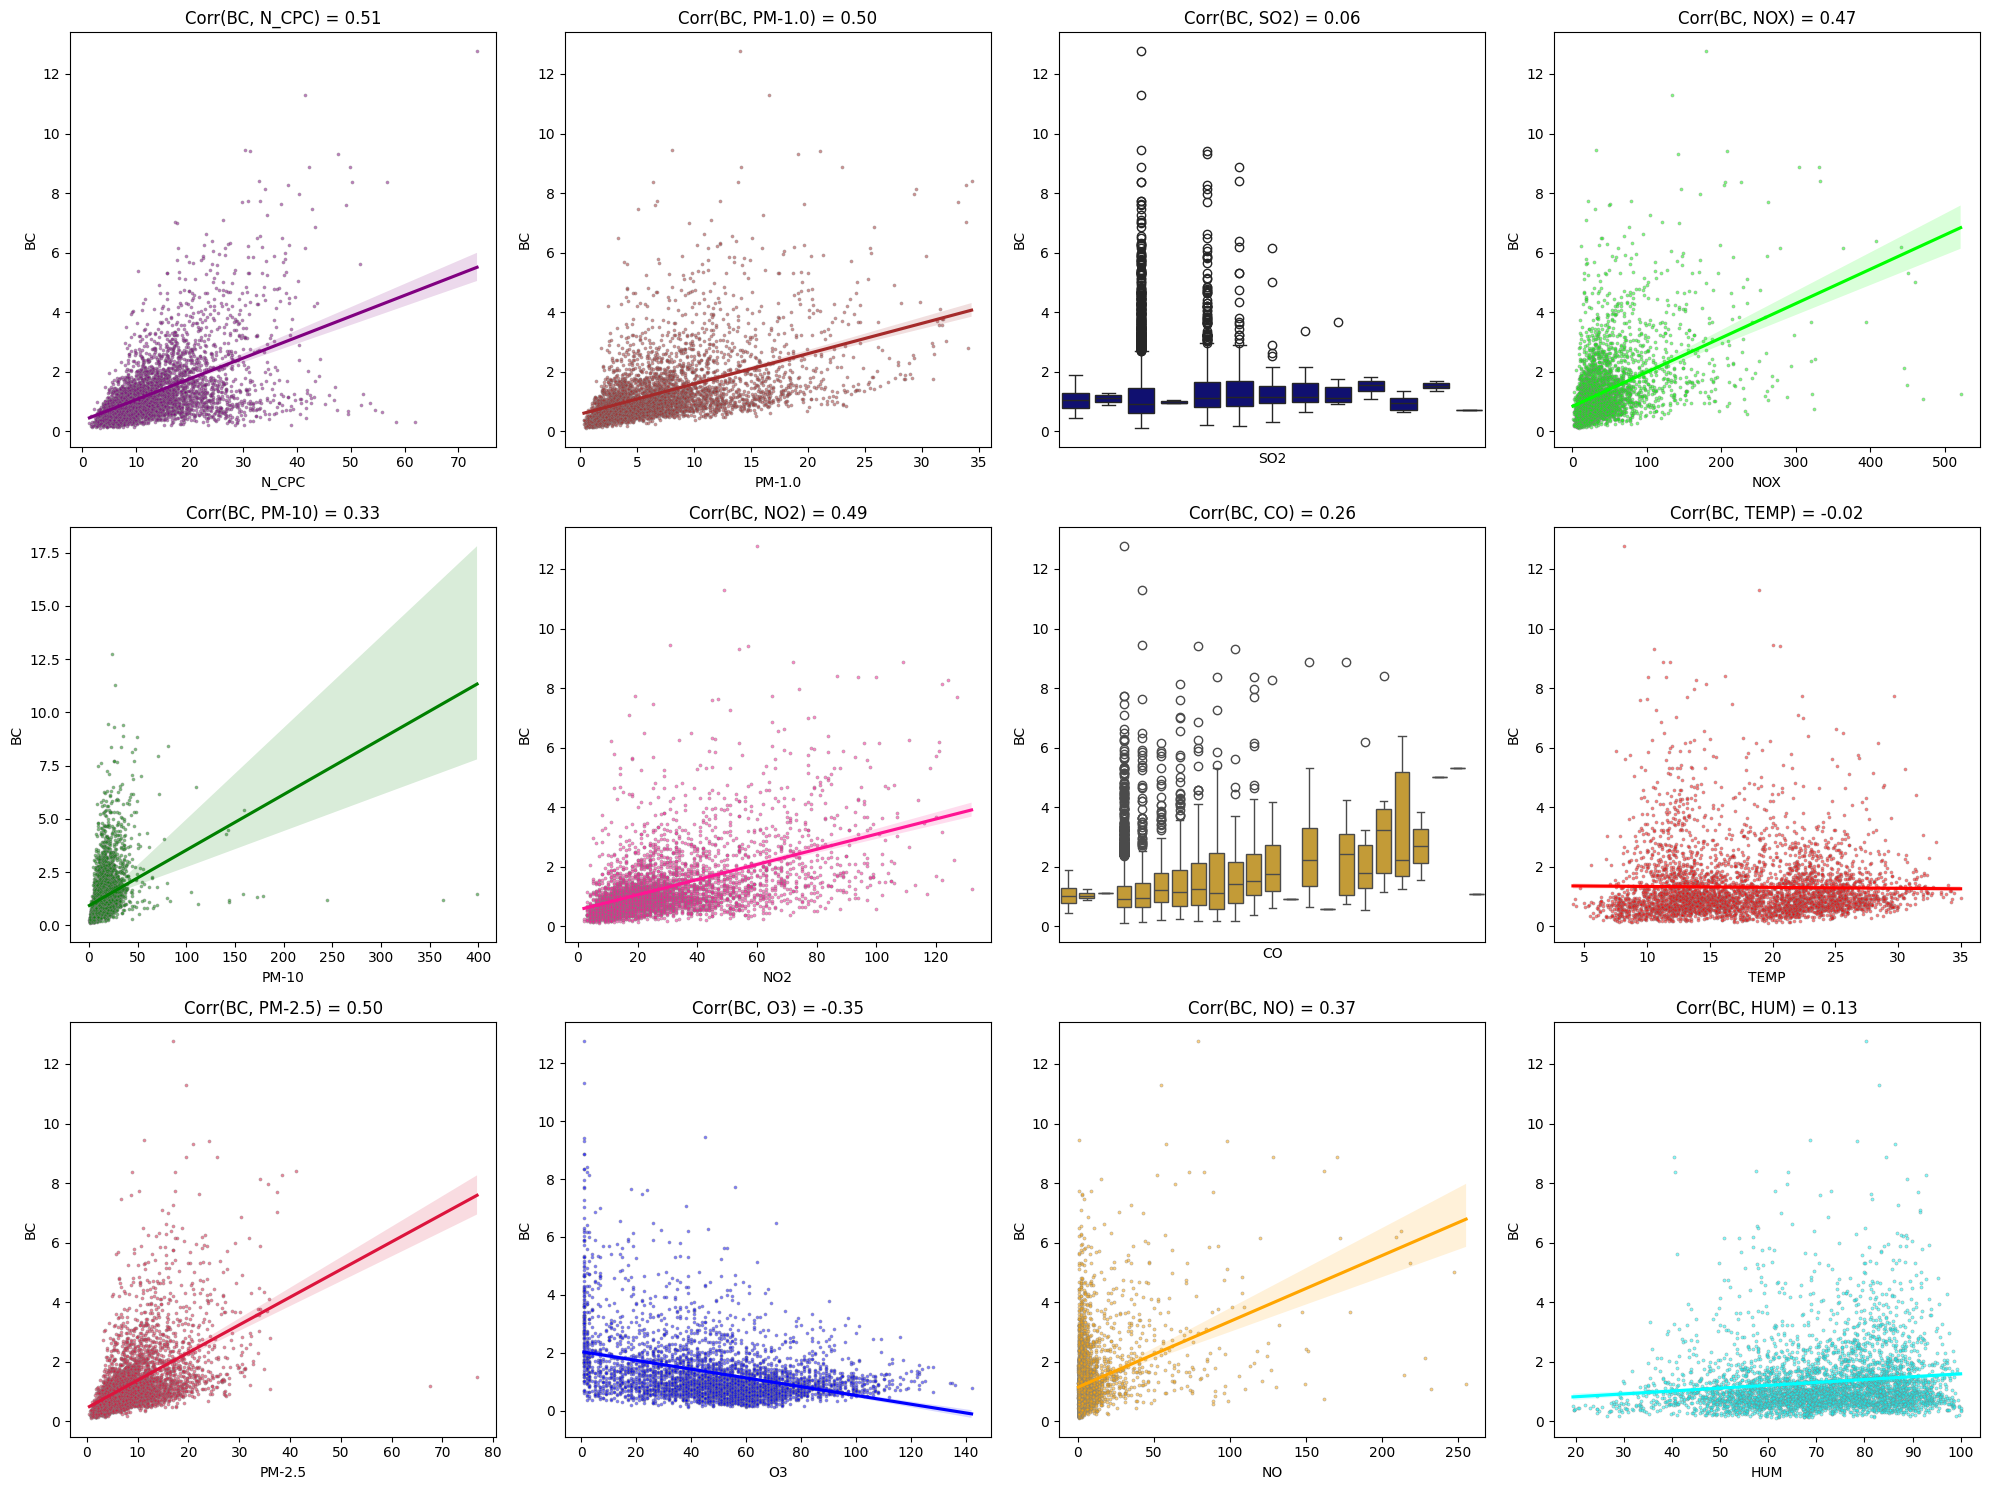

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all columns except 'BC' and 'date'
columns_of_interest = [col for col in df.columns if (col != 'BC' and col != 'date')]

# Create a 4x3 grid of axes for subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Loop over the columns and create a scatter plot with regression line for each one
for i, column in enumerate(columns_of_interest):
    row = i % 3
    col = i // 3
    if column in ['CO', 'SO2']:
        sns.boxplot(x=column, y='BC', ax=axs[row, col], data=df, color=colors[column])
        axs[row, col].set(xticks=[])  # Remove x-ticks
        axs[row, col].set_title(f'Corr(BC, {column}) = {correlation_matrix["BC"][column]:.2f}')
    else:
        sns.regplot(x=df[column], y=df['BC'], ax=axs[row, col], color=colors[column], 
                    scatter_kws={'s': 5, 'alpha': 0.5, 'edgecolor': 'grey', 'linewidths': 0.5})
        axs[row, col].set_title(f'Corr(BC, {column}) = {correlation_matrix["BC"][column]:.2f}')

# Remove any unused subplots
for j in range(i+1, 12):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

## Normalize the data before the temporal trend comparision

In [6]:
# Create a copy of the 'date' column
date_column = df['date'].copy()

# normalize all columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# This will remove the date column from the dataframe
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

## Get the monthly averages and plot the trends

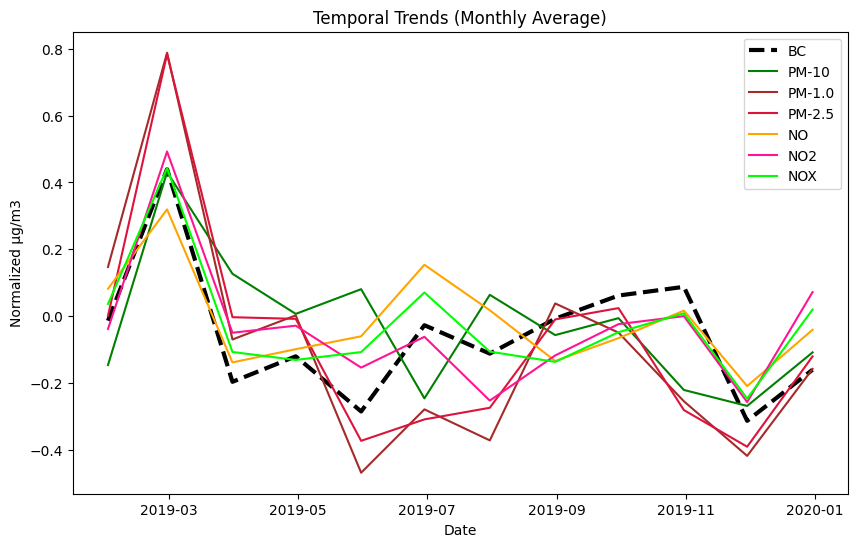

In [7]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Convert 'date' column to datetime format if it's not already
if df_copy['date'].dtype != 'datetime64[ns]':
    df_copy['date'] = pd.to_datetime(df_copy['date'])

# Set 'date' as the index
df_copy.set_index('date', inplace=True)

# Resample to a monthly frequency and calculate the mean
df_monthly = df_copy.resample('ME').mean()

# Plot the monthly averages
plt.figure(figsize=(10, 6))

plt.plot(df_monthly.index, df_monthly['BC'], label='BC', linestyle='--', color='black', linewidth=3)
columns_to_plot = ['PM-10', 'PM-1.0', 'PM-2.5', 'NO', 'NO2', 'NOX']
for column in columns_to_plot:
    plt.plot(df_monthly.index, df_monthly[column], label=column, color=colors[column])

plt.xlabel('Date')
plt.ylabel('Normalized μg/m3')
plt.title('Temporal Trends (Monthly Average)')
plt.legend()
plt.show()

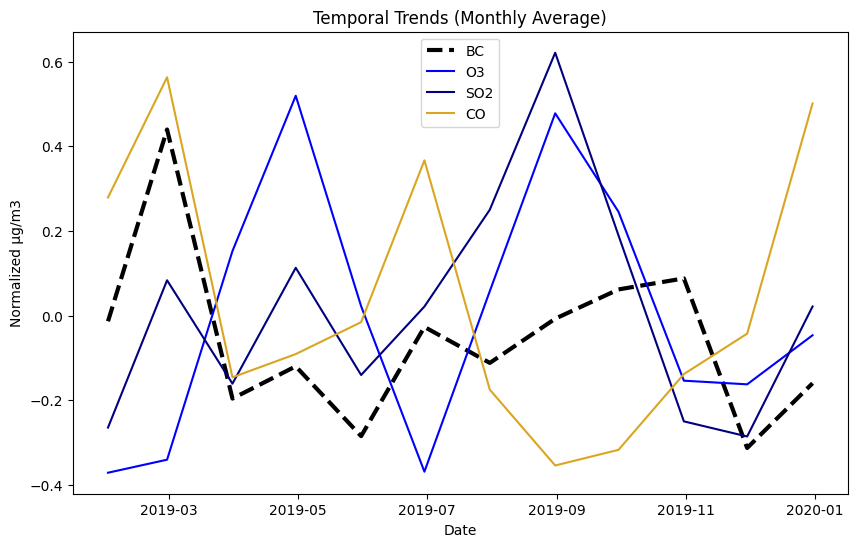

In [8]:

# Plot the monthly averages
plt.figure(figsize=(10, 6))

plt.plot(df_monthly.index, df_monthly['BC'], label='BC', linestyle='--', color='black', linewidth=3)
columns_to_plot = ['O3', 'SO2', 'CO']
for column in columns_to_plot:
    plt.plot(df_monthly.index, df_monthly[column], label=column, color=colors[column])

plt.xlabel('Date')
plt.ylabel('Normalized μg/m3')
plt.title('Temporal Trends (Monthly Average)')
plt.legend()
plt.show()

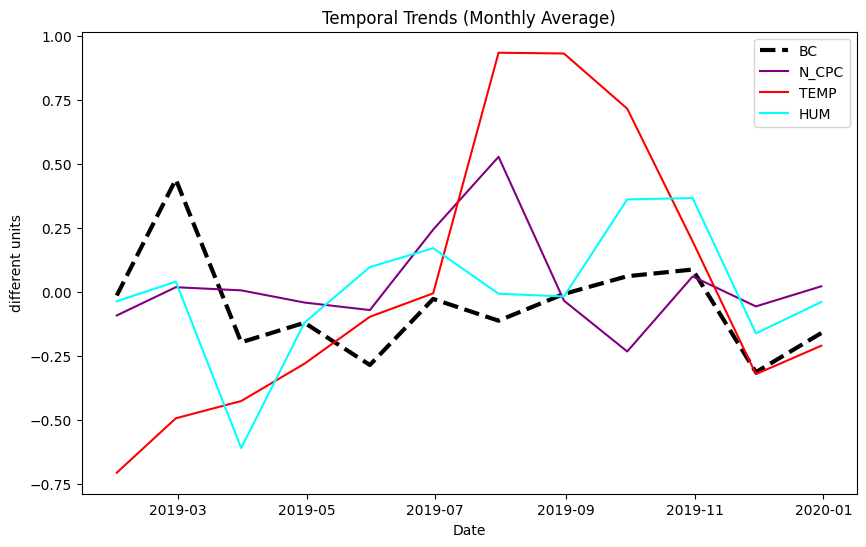

In [9]:
# Plot the monthly averages
plt.figure(figsize=(10, 6))

plt.plot(df_monthly.index, df_monthly['BC'], label='BC', linestyle='--', color='black', linewidth=3)
columns_to_plot = ['N_CPC','TEMP', 'HUM']
for column in columns_to_plot:
    plt.plot(df_monthly.index, df_monthly[column], color = colors[column], label=column)

plt.xlabel('Date')
plt.ylabel('different units')
plt.title('Temporal Trends (Monthly Average)')
plt.legend()
plt.show()

Shuffle the data into train and test sets

In [224]:
from sklearn.model_selection import train_test_split

features = ['N_CPC', 'PM-10', 'PM-1.0', 'NO2', 'O3', 'SO2', 'CO', 'NO', 'NO2', 'NOX', 'TEMP', 'HUM']
target = 'BC'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=52, shuffle=True)
train_dates = date_column[X_train.index]
test_dates = date_column[X_test.index]

A linear regression model is bound to not be very good, but we still do it for illustration porpouses.

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Create a linear regression model
LinReg = LinearRegression()

# Train the model
LinReg.fit(X_train, y_train)

# Make predictions on the testing set
pred_linreg = LinReg.predict(X_test)

# Calculate R^2
r2_linreg = r2_score(y_test, pred_linreg)
print(f'R^2: {r2_linreg}')

# Calculate RMSE
rmse_linreg = sqrt(mean_squared_error(y_test, pred_linreg))
print(f'RMSE: {rmse_linreg}')

R^2: 0.5424684536944936
RMSE: 0.6864501547334452


## Support Vector Regression model

Start by comparing kernels

In [227]:
from sklearn.svm import SVR
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    # SVR with 'rbf' kernel works best
    Svr = SVR(kernel=k)

    # Train the model
    Svr.fit(X_train, y_train)

    # Generate predictions for the test set
    pred_svr = Svr.predict(X_test)

    # Calculate R^2
    r2_svr = r2_score(y_test, pred_svr)
    print(f'R^2 {k}: {r2_svr}')

    # Calculate RMSE
    rmse_svr = sqrt(mean_squared_error(y_test, pred_svr))
    print(f'RMSE {k}: {rmse_svr}')


R^2 linear: 0.48173413922359876
RMSE linear: 0.730591788143034
R^2 poly: 0.5196027174378466
RMSE poly: 0.7033941572296377
R^2 rbf: 0.6448681787447634
RMSE rbf: 0.6047742335883145
R^2 sigmoid: -3414.7858514401237
RMSE sigmoid: 59.3121685881576


We choose Radial Basis function as it is the best. Now we do hyperparameter tuning using that kernel.

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 1],  # Epsilon in the epsilon-SVR model
    'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10]  # Kernel coefficient for 'rbf'
}

# Create a base model
svr = SVR(kernel='rbf')

# Instantiate the grid search model. Uses all processors with "n_jobs=-1" 
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters for SVR: ", best_params)
print(f'Gamma_auto = {1 / X_train.shape[1]}')


KeyboardInterrupt: 

In [231]:
Svr = SVR(kernel='rbf', C=10, epsilon=0.1, gamma='auto')

# Train the model
Svr.fit(X_train, y_train)

# Generate predictions for the test set
pred_svr = Svr.predict(X_test)

# Calculate R^2
r2_svr = r2_score(y_test, pred_svr)
print(f'R^2 : {r2_svr}')

# Calculate RMSE
rmse_svr = sqrt(mean_squared_error(y_test, pred_svr))
print(f'RMSE : {rmse_svr}')

R^2 : 0.7097078388235909
RMSE : 0.5467844306306988


## Random Forest

In [107]:
from sklearn.ensemble import RandomForestRegressor

rf_mse = []
rf_r2 = []
Ms = range(1, 50, 1)
# Get the number of features
for M in Ms:
    rf = RandomForestRegressor(n_estimators=M)
    rf.fit(X_train, y_train)
    pred_rf = rf.predict(X_test)
    rf_mse.append(mean_squared_error(y_test, pred_rf))
    rf_r2.append(r2_score(y_test, pred_rf))


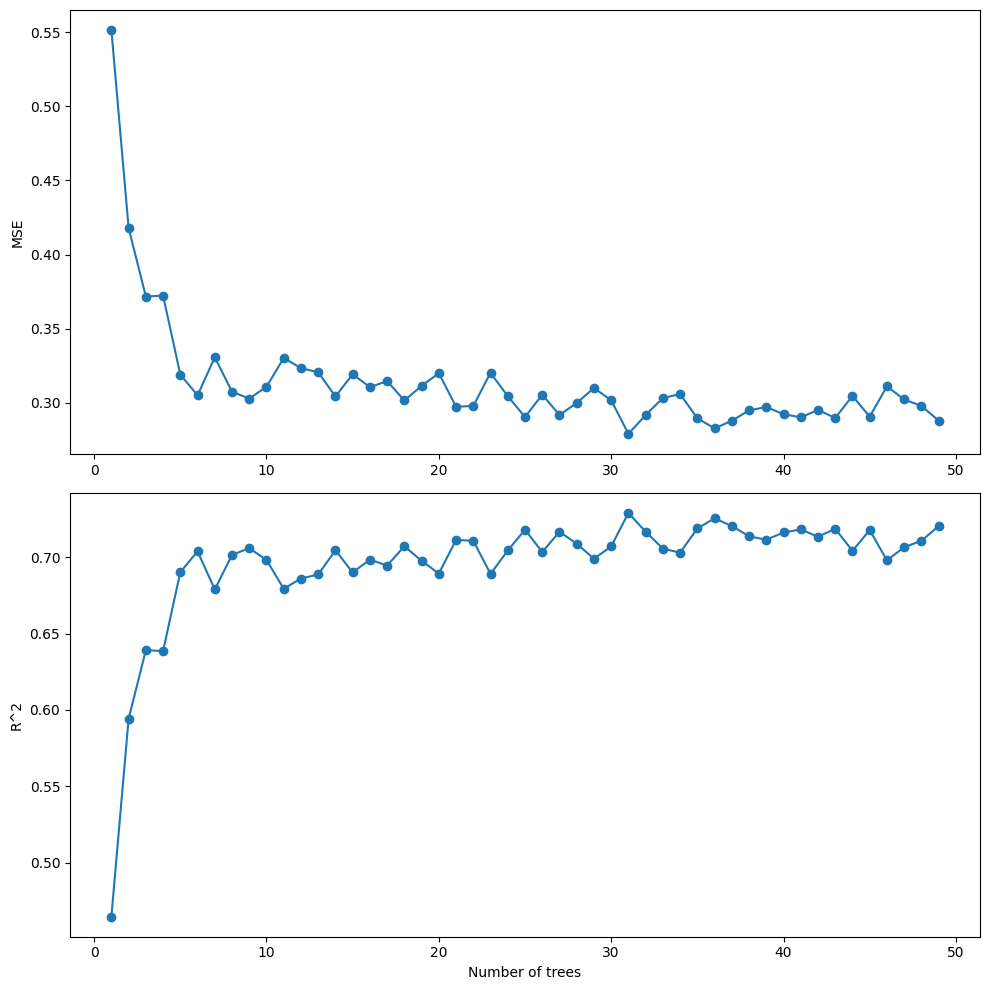

In [110]:
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

# Plot MSE values
ax1.plot(Ms, rf_mse, marker='o')
ax1.set_ylabel('MSE')

# Plot R^2 values
ax2.plot(Ms, rf_r2, marker='o')
ax2.set_xlabel('Number of trees')
ax2.set_ylabel('R^2')

# Display the figure
plt.tight_layout()
plt.show()

In [141]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store the metrics
r2_values = []
rmse_values = []

# Run the model 100 times
for _ in range(100):
    # Create a new model with the best parameters
    Rf = RandomForestRegressor(n_estimators=1)
    # Train the model
    Rf.fit(X_train, y_train)

    # Generate predictions for the test set
    pred_rf = Rf.predict(X_test)

    # Calculate R^2 and append to list
    r2_rf = r2_score(y_test, pred_rf)
    r2_values.append(r2_rf)

    # Calculate RMSE and append to list
    rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
    rmse_values.append(rmse_rf)

# Calculate the mean and standard deviation of R^2 and RMSE
mean_r2 = np.mean(r2_values)
std_r2 = np.std(r2_values)
mean_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)

print(f'Mean R^2: {mean_r2}, Std R^2: {std_r2}')
print(f'Mean RMSE: {mean_rmse}, Std RMSE: {std_rmse}')

Mean R^2: 0.43343437475308655, Std R^2: 0.054166402294552767
Mean RMSE: 0.7630129482569731, Std RMSE: 0.036328338984361525


In [232]:
from sklearn.ensemble import RandomForestRegressor

# Create a new model with the best parameters
Rf = RandomForestRegressor(n_estimators=200)

# Train the model
Rf.fit(X_train, y_train)

# Generate predictions for the test set
pred_rf = Rf.predict(X_test)

# Calculate R^2
r2_rf = r2_score(y_test, pred_rf)
print(f'R^2: {r2_rf}')

# Calculate RMSE
rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
print(f'RMSE: {rmse_rf}')

R^2: 0.7179454596748656
RMSE: 0.5389705469680265


## Feed-Forward Neural Network

Compare activation functions

In [158]:
import numpy as np
from torch import nn

activation_functions = [
    nn.ReLU(), 
    nn.Tanh(), 
    nn.Sigmoid(), 
    nn.ELU(), 
    nn.PReLU(), 
    nn.LeakyReLU(), 
    nn.Threshold(0.1, 0), 
    nn.Hardtanh(), 
    nn.SELU(), 
    nn.CELU(), 
    nn.GELU(), 
    nn.SiLU(), 
    nn.Mish()
]
# Initialize lists to store the metrics
r2_values = []
rmse_values = []

# Number of trials
n_trials = 10

# Loop over the activation functions
for activation in activation_functions:
    # Initialize lists to store the metrics for each trial
    r2_trials = []
    rmse_trials = []

    for trial in range(n_trials):
        # Define the model
        Fnn = nn.Sequential(
            nn.Linear(X_train.shape[1], 100),
            activation,
            nn.Linear(100, 1)
        )

        # Define the loss function and the optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(Fnn.parameters(), lr=0.01)

        # Train the model
        for epoch in range(50):
            Fnn.train()
            optimizer.zero_grad()

            y_pred = Fnn(X_train_torch)
            loss = criterion(y_pred, y_train_torch.view(-1, 1))

            loss.backward()
            optimizer.step()

        # Generate predictions for the test set
        Fnn.eval()
        with torch.no_grad():
            pred_nn = Fnn(X_test_torch).numpy().flatten()

        # Calculate R^2 and append to list
        r2_nn = r2_score(y_test, pred_nn)
        r2_trials.append(r2_nn)

        # Calculate RMSE and append to list
        rmse_nn = sqrt(mean_squared_error(y_test, pred_nn))
        rmse_trials.append(rmse_nn)

    # Append the mean and std of the metrics to the lists
    r2_values.append((np.mean(r2_trials), np.std(r2_trials)))
    rmse_values.append((np.mean(rmse_trials), np.std(rmse_trials)))

# Print the results
for i, activation in enumerate(activation_functions):
    print(f'Activation: {type(activation).__name__}, R^2: {r2_values[i][0]} ± {r2_values[i][1]}, RMSE: {rmse_values[i][0]} ± {rmse_values[i][1]}')

Activation: ReLU, R^2: 0.7139899929737943 ± 0.006370422396460408, RMSE: 0.5427029241169377 ± 0.006044811960054477
Activation: Tanh, R^2: 0.6933317693301342 ± 0.00831035856046562, RMSE: 0.561944288655712 ± 0.0075906706960007335
Activation: Sigmoid, R^2: 0.58019374528692 ± 0.00929785368688709, RMSE: 0.6575010866220601 ± 0.007258587252957742
Activation: ELU, R^2: 0.6797774710452744 ± 0.0030147511774733233, RMSE: 0.5742746006691319 ± 0.0027052074733408876
Activation: PReLU, R^2: 0.7287783019314353 ± 0.008196312286377594, RMSE: 0.5284590583956286 ± 0.007967478903960622
Activation: LeakyReLU, R^2: 0.7145130298950305 ± 0.008481393869078258, RMSE: 0.5421805374722575 ± 0.008036808153085629
Activation: Threshold, R^2: 0.7176267214050978 ± 0.0056453890839987, RMSE: 0.5392479508534042 ± 0.005400739696567152
Activation: Hardtanh, R^2: 0.6974686348876374 ± 0.01000598565776203, RMSE: 0.5581163344557394 ± 0.009196871495705599
Activation: SELU, R^2: 0.6788944537396243 ± 0.010321886378888243, RMSE: 0.57

Final NN

In [233]:
import torch
from torch import nn

# Define the model
Fnn = nn.Sequential(
    nn.Linear(X_train.shape[1], 100),
    nn.PReLU(),
    nn.Linear(100, 1)
)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(Fnn.parameters(), lr=0.01)
X_train_torch = torch.tensor(X_train.values, dtype=torch.float)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float)

# Train the model
for epoch in range(100):
    Fnn.train()
    optimizer.zero_grad()
    
    y_pred = Fnn(X_train_torch)
    loss = criterion(y_pred, y_train_torch.view(-1, 1))
    
    loss.backward()
    optimizer.step()

# Generate predictions for the test set
Fnn.eval()
with torch.no_grad():
    pred_nn = Fnn(X_test_torch).numpy().flatten()

# Calculate R^2
r2_nn = r2_score(y_test, pred_nn)
print(f'R^2: {r2_nn}')

# Calculate RMSE
rmse_nn = sqrt(mean_squared_error(y_test, pred_nn))
print(f'RMSE: {rmse_nn}')

R^2: 0.7116187622895451
RMSE: 0.5449817839473861


In [ ]:
num_parameters = sum(p.numel() for p in Fnn.parameters() if p.requires_grad)
print(f'Number of parameters: {num_parameters}')

Number of parameters: 1402


## Conclusion Results

## Plot monthly average Predictions

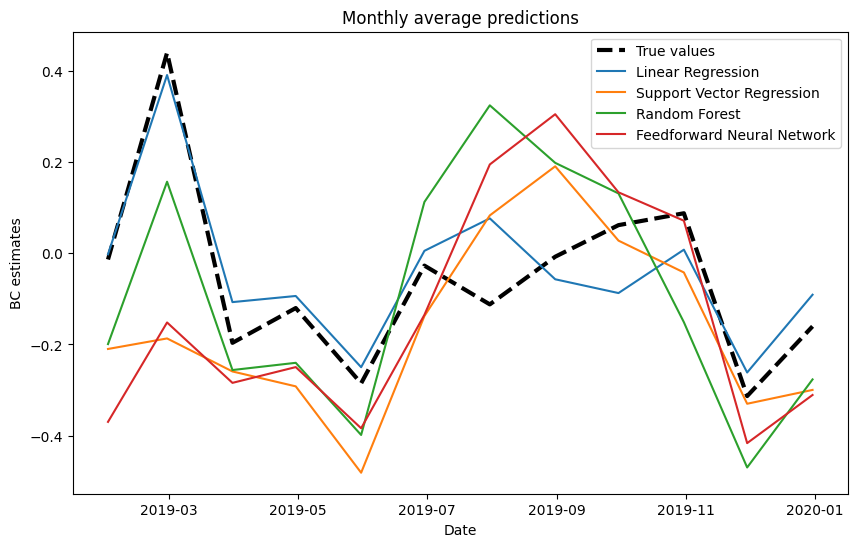

In [234]:
plt.figure(figsize=(10, 6))
    
plt.plot(df_monthly.index, df_monthly['BC'], label='True values', color=colors['BC'], linestyle='--', linewidth=3)
plt.plot(df_monthly.index, LinReg.predict(df_monthly[features]), label='Linear Regression')
plt.plot(df_monthly.index, Svr.predict(df_monthly[features]), label='Support Vector Regression')
plt.plot(df_monthly.index, Rf.predict(df_monthly[features]), label='Random Forest')
plt.plot(df_monthly.index, Fnn(torch.tensor(df_monthly[features].values, dtype=torch.float)).detach().numpy(), label='Feedforward Neural Network')
plt.xlabel('Date')
plt.ylabel('BC estimates')
plt.title('Monthly average predictions')
plt.legend()
plt.show()

## Weekly averages

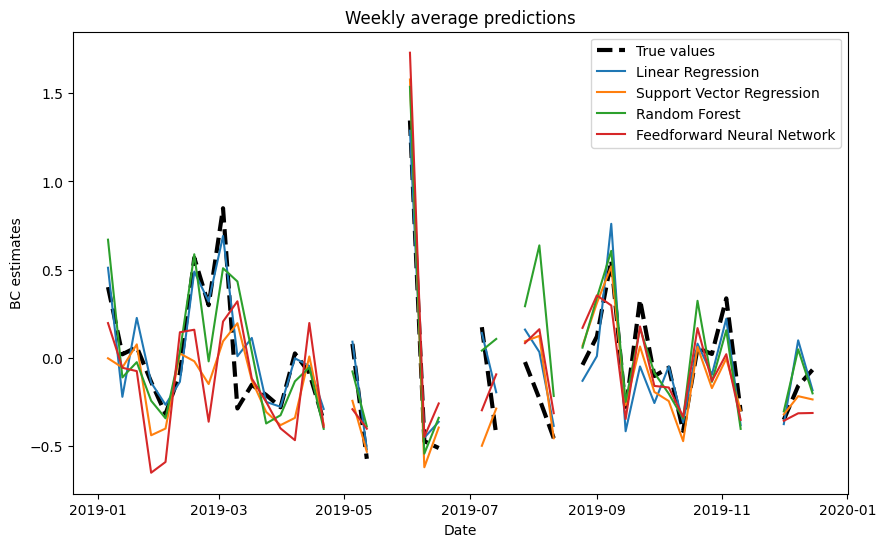

In [235]:
df_copy = df.copy()
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy.index = df_copy['date']
df_weekly = df_copy.resample('W').mean()
# Define a function to make predictions or return NaN
def predict_or_nan(row, model):
    if row.isna().any():
        return np.nan
    else:
        row_df = pd.DataFrame(row[features].values.reshape(1, -1), columns=features)
        # Convert row to DataFrame with feature names
        return model.predict(row_df)[0]
    
def predict_or_nan_fnn(row):
    if row.isna().any():
        return np.nan
    else:
        row_df = pd.DataFrame(row[features].values.reshape(1, -1), columns=features)
        # Convert the DataFrame to a numpy array of type float32
        row_values = row_df.values.astype(np.float32)
        # Make prediction and convert to numpy array
        prediction = Fnn(torch.tensor(row_values)).detach().numpy()
        return prediction[0][0]
    

# Apply the function to each row of df_weekly for each model
df_weekly['LinReg_predictions'] = df_weekly.apply(predict_or_nan, axis=1, model=LinReg)
df_weekly['Svr_predictions'] = df_weekly.apply(predict_or_nan, axis=1, model=Svr)
df_weekly['Rf_predictions'] = df_weekly.apply(predict_or_nan, axis=1, model=Rf)
df_weekly['Fnn_predictions'] = df_weekly.apply(predict_or_nan_fnn, axis=1)
# Plot the weekly averages along with the predictions
plt.figure(figsize=(10, 6))

plt.plot(df_weekly.index, df_weekly['BC'], label='True values', color='black', linestyle='--', linewidth=3)
plt.plot(df_weekly.index, df_weekly['LinReg_predictions'], label='Linear Regression')
plt.plot(df_weekly.index, df_weekly['Svr_predictions'], label='Support Vector Regression')
plt.plot(df_weekly.index, df_weekly['Rf_predictions'], label='Random Forest')
plt.plot(df_weekly.index, df_weekly['Fnn_predictions'], label='Feedforward Neural Network')
plt.xlabel('Date')
plt.ylabel('BC estimates')
plt.title('Weekly average predictions')
plt.legend()
plt.show()

In [220]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import torch
import time

# Define your models
models = {
    'Linear Regression': LinReg,
    'SVR': Svr,
    'Random Forest': Rf,
    'Neural Network': Fnn
}

# Perform prediction for each model
for name, model in models.items():
    start_time = time.time()
    # Check if the model is a PyTorch model
    if isinstance(model, torch.nn.Module):
        # Convert the test data to a PyTorch tensor
        X_test_tensor = torch.from_numpy(X_test.values).float()

        # Put the model in evaluation mode
        model.eval()

        # Make predictions
        with torch.no_grad():
            predictions = model(X_test_tensor).numpy()


    else:
        # Make predictions
        predictions = model.predict(X_test)

    # Calculate the time it took to make predictions
    elapsed_time = time.time() - start_time
    # Calculate R^2 and RMSE
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Output results
    print(f'{name}: R^2 = {r2:.4f}, RMSE = {rmse:.4f}, Time = {elapsed_time:.4f} seconds')

Linear Regression: R^2 = 0.5277, RMSE = 0.6850, Time = 0.0020 seconds
SVR: R^2 = 0.6872, RMSE = 0.5575, Time = 0.1800 seconds
Random Forest: R^2 = 0.6341, RMSE = 0.6029, Time = 0.0350 seconds
Neural Network: R^2 = 0.6868, RMSE = 0.5578, Time = 0.0010 seconds


## Methods hyperparameter discovery.
### FNN width?

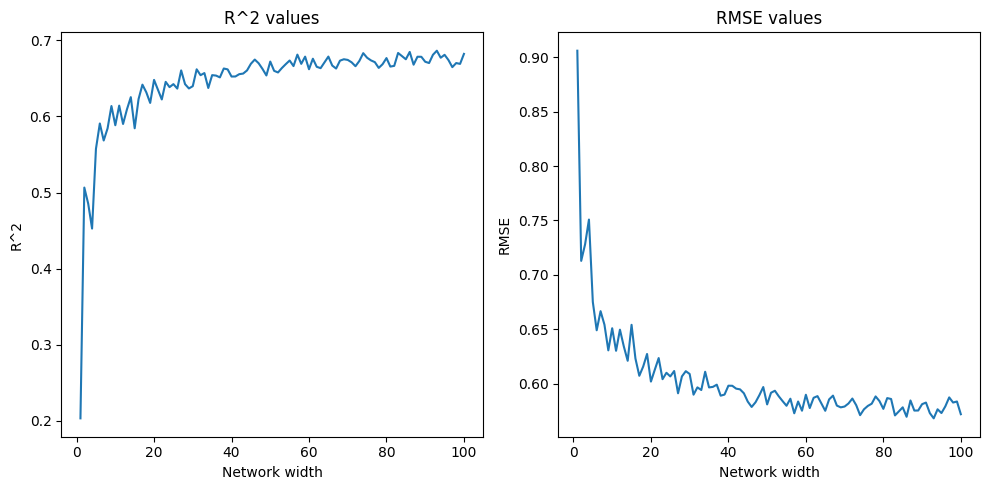

In [159]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import torch
from torch import nn

# Initialize lists to store R^2 and RMSE values
r2_values = []
rmse_values = []

# Iterate over different network widths
for width in range(1, 101):
    # Define the model with the current width
    Fnn = nn.Sequential(
        nn.Linear(X_train.shape[1], width),
        nn.ReLU(),
        nn.Linear(width, 1)
    )

    # Define the loss function and the optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(Fnn.parameters(), lr=0.01)

    # Train the model
    for epoch in range(50):
        Fnn.train()
        optimizer.zero_grad()

        y_pred = Fnn(X_train_torch)
        loss = criterion(y_pred, y_train_torch.view(-1, 1))

        loss.backward()
        optimizer.step()

    # Generate predictions for the test set
    Fnn.eval()
    with torch.no_grad():
        pred_nn = Fnn(X_test_torch).numpy().flatten()

    # Calculate R^2 and store it
    r2_nn = r2_score(y_test, pred_nn)
    r2_values.append(r2_nn)

    # Calculate RMSE and store it
    rmse_nn = sqrt(mean_squared_error(y_test, pred_nn))
    rmse_values.append(rmse_nn)


# Plot R^2 and RMSE values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 101), r2_values)
plt.title('R^2 values')
plt.xlabel('Network width')
plt.ylabel('R^2')

plt.subplot(1, 2, 2)
plt.plot(range(1, 101), rmse_values)
plt.title('RMSE values')
plt.xlabel('Network width')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()